In [1]:
import os

import pandas as pd
import numpy as np

import dlc2kinematics

In [2]:
# Set the path to the .c3d file and the joints_dictionary

sample_files_path = "./examples/runway03.c3d"

joints_dict = {'left_hip_joint': ['lcrest', 'lhip', 'lknee'],
 'left_knee_joint': ['lhip', 'lknee', 'lankle'],
 'left_ankle_joint': ['lknee', 'lankle', 'lmtp'],
 'right_hip_joint': ['rcrest', 'rhip', 'rknee'],
 'right_knee_joint': ['rhip', 'rknee', 'rankle'],
 'right_ankle_joint': ['rknee', 'rankle', 'rmtp']}


In [3]:
# Getting the dataframe plus all the metadata from the .c3d file

df, bodyparts, scorer, first_frame, last_frame, sample_rate = dlc2kinematics.preprocess_c3d.load_c3d_data(sample_files_path,
                                                                                                         scorer="ELG")

In [4]:
# Our file has spurious bodyparts called *12, *13, *14, *15 dropping those columns here.

bodyparts_to_drop = [i[1] for i in df.columns.to_list()[::3] if i[1].startswith(("*"))]
df = df.drop(bodyparts_to_drop, axis=1, level=1, inplace=False)
bodyparts = [bp for bp in bodyparts if bp not in bodyparts_to_drop]

Computing joint angles for left_hip_joint
Computing joint angles for left_knee_joint
Computing joint angles for left_ankle_joint
Computing joint angles for right_hip_joint
Computing joint angles for right_knee_joint
Computing joint angles for right_ankle_joint
Saving the joint angles as a pandas array in /Users/elisa/Documents/Repos/DLC2Kinematics
Saving the joint angular velocity as a pandas array in /Users/elisa/Documents/Repos/DLC2Kinematics 
Saving the joint angular acceleration as a pandas array in /Users/elisa/Documents/Repos/DLC2Kinematics 


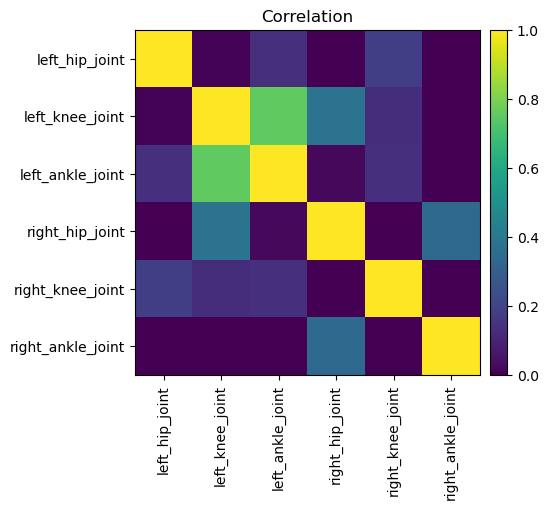

In [5]:
# Testing the main functions 

df_vel = dlc2kinematics.compute_velocity(df, bodyparts=['all'])
df_acc = dlc2kinematics.compute_acceleration(df, bodyparts=['all'])
df_speed = dlc2kinematics.compute_speed(df,bodyparts=['all'])
joint_angles = dlc2kinematics.compute_joint_angles(df,joints_dict)
joint_vel = dlc2kinematics.compute_joint_velocity(joint_angles)
joint_acc = dlc2kinematics.compute_joint_acceleration(joint_angles)
corr = dlc2kinematics.compute_correlation(joint_vel, plot=True)

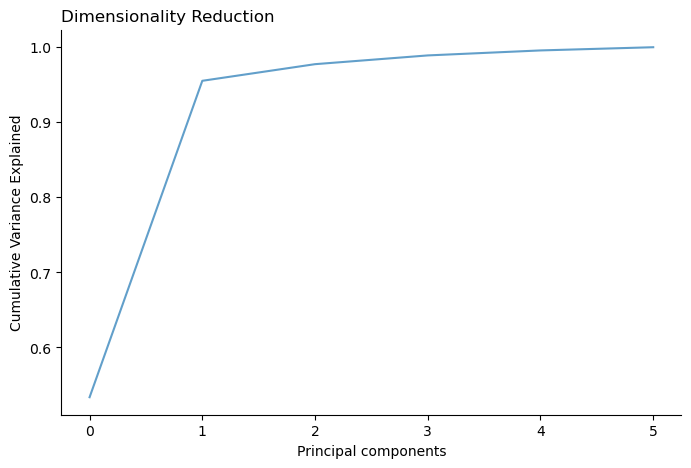

In [6]:
pca = dlc2kinematics.compute_pca(joint_vel, plot=True)

In [7]:
# Adding a mock column likelihood to be able to use compute_umap

for bp in bodyparts:
    df["scorer", bp, "likelihood"] = np.ones(len(df))
df.sort_index(axis=1)

scorer           ELG                                                           \
bodyparts     lankle                            lcrest                          
coords             x           y          z          x           y          z   
0          47.007511 -493.187439  25.222166  83.864677 -414.261658  72.140793   
1          46.903336 -491.609192  25.788338  84.566307 -412.747345  72.182121   
2          46.915806 -489.708313  26.647650  85.242775 -411.256561  72.216339   
3          47.232620 -487.328644  27.819424  85.803703 -409.719360  72.257660   
4          47.903484 -484.629700  29.323593  86.512001 -408.312714  72.297142   
..               ...         ...        ...        ...         ...        ...   
374        56.716793  445.170441  18.133451  87.442825  510.867004  67.838043   
375        56.791084  445.615295  18.260849  88.109924  511.333649  67.774216   
376        56.691242  446.014771  18.417027  88.573105  511.901520  67.663422   
377        56.792355  446.489868  18.682011  89.119133  512.372131  67.560394   
378        57.553661  447.285370  18.786667  89.723595  512.871460  67.441116   

scorer                                                  ...     scorer  \
bodyparts       lhip                             lknee  ...       lhip   
coords             x           y          z          x  ... likelihood   
0          67.525536 -444.997559  52.688873  59.719612  ...        1.0   
1          67.901657 -443.166595  53.146946  60.131798  ...        1.0   
2          68.268326 -441.711517  53.564060  60.487247  ...        1.0   
3          68.668564 -440.174835  53.945728  60.855938  ...        1.0   
4          68.933228 -438.631714  54.380566  61.266098  ...        1.0   
..               ...         ...        ...        ...  ...        ...   
374        66.164879  484.880341  45.812061  66.019554  ...        1.0   
375        66.589836  485.486023  45.872482  66.510834  ...        1.0   
376        66.856987  486.089569  45.935753  66.898468  ...        1.0   
377        67.202644  486.617615  45.952614  67.192963  ...        1.0   
378        67.579010  487.180145  46.003773  67.575958  ...        1.0   

scorer                                                                       \
bodyparts      lknee       lmtp  lshoulder     rankle     rcrest       rhip   
coords    likelihood likelihood likelihood likelihood likelihood likelihood   
0                1.0        1.0        1.0        1.0        1.0        1.0   
1                1.0        1.0        1.0        1.0        1.0        1.0   
2                1.0        1.0        1.0        1.0        1.0        1.0   
3                1.0        1.0        1.0        1.0        1.0        1.0   
4                1.0        1.0        1.0        1.0        1.0        1.0   
..               ...        ...        ...        ...        ...        ...   
374              1.0        1.0        1.0        1.0        1.0        1.0   
375              1.0        1.0        1.0        1.0        1.0        1.0   
376              1.0        1.0        1.0        1.0        1.0        1.0   
377              1.0        1.0        1.0        1.0        1.0        1.0   
378              1.0        1.0        1.0        1.0        1.0        1.0   

scorer                                      
bodyparts      rknee       rmtp  rshoulder  
coords    likelihood likelihood likelihood  
0                1.0        1.0        1.0  
1                1.0        1.0        1.0  
2                1.0        1.0        1.0  
3                1.0        1.0        1.0  
4                1.0        1.0        1.0  
..               ...        ...        ...  
374              1.0        1.0        1.0  
375              1.0        1.0        1.0  
376              1.0        1.0        1.0  
377              1.0        1.0        1.0  
378              1.0        1.0        1.0  

[379 rows x 48 columns]

In [8]:
# This fails to run on my end unless I modify the import in the backend, 
# from import umap to import umap.umap_ as umap but it probably is a problem of my setup

keypoints = ['lknee', 'rknee']

embedding, transformed_data = dlc2kinematics.compute_umap(df, keypoints=keypoints, chunk_length=30, fit_transform=True, n_neighbors=30, n_components=3, metric="euclidean")
dlc2kinematics.plot_umap(transformed_data, size=5, alpha=1, color="indigo", figsize=(10, 6))


AttributeError: module 'umap' has no attribute 'UMAP'